In [9]:
# # Analyse et Nettoyage des Données Tawjihi
# 
# Ce notebook contient l'analyse exploratoire des données (EDA) et le nettoyage des données du guide Tawjihi. Chaque étape est séparée en cellules distinctes pour une meilleure compréhension.

# %% [markdown]
# ## 1. Importation des Bibliothèques Nécessaires

# %%
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# ## 2. Chargement des Données

# %%
# Création d'une copie du dataset original
file_path = 'data_expanded.csv'
try:
    df = pd.read_csv(file_path)
    df_original = df.copy()  # Sauvegarde de l'original
    print(f"Dataset chargé avec succès depuis '{file_path}'.")
    print(f"Dimensions du dataset : {df.shape}")
except FileNotFoundError:
    print(f"Erreur : Le fichier '{file_path}' est introuvable.")
except Exception as e:
    print(f"Erreur lors du chargement : {e}")

# %% [markdown]
# ## 3. Inspection Initiale des Données

# %%
print("Aperçu des premières lignes :")
display(df.head())

print("\nInformations sur les colonnes :")
display(df.info())

print("\nStatistiques descriptives :")
display(df.describe(include='all'))

Dataset chargé avec succès depuis 'data_expanded.csv'.
Dimensions du dataset : (1651, 19)
Aperçu des premières lignes :


,Écoles/Instituts,Ville,Type d'établissement,Diplôme,Durée d'études,Conditions d'accès,Filières Bacs acceptées,Seuil,Filières d'études possibles,Seuil (2024),Seuil (2022),Seuil (2023),Type,Seuil (2020),Seuil (2019),Seuil (2021),Seuil (2017),Seuil (2013),Seuil (2018)
0,Facultés des Lettres et des Sciences Humaines ...,Casablanca (Ain Chock,Université publique,Licence,3 ans,Baccalauréat toutes filières. Des conditions s...,Toutes les filières du baccalauréat,N/A (Accès ouvert basé sur la répartition géog...,Études Islamiques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Facultés des Lettres et des Sciences Humaines ...,Casablanca (Ain Chock,Université publique,Licence,3 ans,Baccalauréat toutes filières. Des conditions s...,Toutes les filières du baccalauréat,N/A (Accès ouvert basé sur la répartition géog...,Études Arabes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Facultés des Lettres et des Sciences Humaines ...,Casablanca (Ain Chock,Université publique,Licence,3 ans,Baccalauréat toutes filières. Des conditions s...,Toutes les filières du baccalauréat,N/A (Accès ouvert basé sur la répartition géog...,Études Amazighes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Facultés des Lettres et des Sciences Humaines ...,Casablanca (Ain Chock,Université publique,Licence,3 ans,Baccalauréat toutes filières. Des conditions s...,Toutes les filières du baccalauréat,N/A (Accès ouvert basé sur la répartition géog...,Études Françaises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Facultés des Lettres et des Sciences Humaines ...,Casablanca (Ain Chock,Université publique,Licence,3 ans,Baccalauréat toutes filières. Des conditions s...,Toutes les filières du baccalauréat,N/A (Accès ouvert basé sur la répartition géog...,Études Anglaises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Écoles/Instituts             1651 non-null   object
 1   Ville                        1651 non-null   object
 2   Type d'établissement         586 non-null    object
 3   Diplôme                      1651 non-null   object
 4   Durée d'études               1651 non-null   object
 5   Conditions d'accès           1651 non-null   object
 6   Filières Bacs acceptées      1651 non-null   object
 7   Seuil                        1412 non-null   object
 8   Filières d'études possibles  1651 non-null   object
 9   Seuil (2024)                 214 non-null    object
 10  Seuil (2022)                 179 non-null    object
 11  Seuil (2023)                 183 non-null    object
 12  Type                         1065 non-null   object
 13  

None


Statistiques descriptives :


,Écoles/Instituts,Ville,Type d'établissement,Diplôme,Durée d'études,Conditions d'accès,Filières Bacs acceptées,Seuil,Filières d'études possibles,Seuil (2024),Seuil (2022),Seuil (2023),Type,Seuil (2020),Seuil (2019),Seuil (2021),Seuil (2017),Seuil (2013),Seuil (2018)
count,1651,1651,586,1651,1651,1651,1651,1412,1651,214,179,183,1065,4,14,6,2,4,5
unique,127,74,5,52,30,80,65,29,488,8,6,8,31,1,7,1,1,1,4
top,Facultés des Lettres et des Sciences Humaines ...,Rabat,Université publique,Licence,3 ans,Baccalauréat toutes filières. Des conditions s...,Toutes les filières du baccalauréat,N/A (Accès ouvert basé sur la répartition géog...,Gestion des Exploitations Agricoles,"{'Eco/SGC': '12.00', 'Bac Prof': '14.00', 'PC/...","{'Eco/SGC': '12.00', 'Bac Prof': '14.50', 'PC/...","{'Eco/SGC': '12.00', 'Bac Prof': '14.00', 'PC/...",Institut public (Agricole),"{'Beni Mellal-Khénifra (Sc Agro)': '13.0', 'Be...","{'Sciences Infirmières': '14.75', 'Sage Femme'...","{'TRRR': '13.00', 'TIMB': '13.00', 'TLB': '16....","{""Branche Gestion et Maîtrise de l'eau (S.Math...","{'Sciences et Technologies': '14.15', 'Science...","{'Logistique': '13.03', 'Civil': '14.12'}"
freq,304,113,510,448,580,304,428,414,33,72,72,72,243,4,6,6,2,4,2


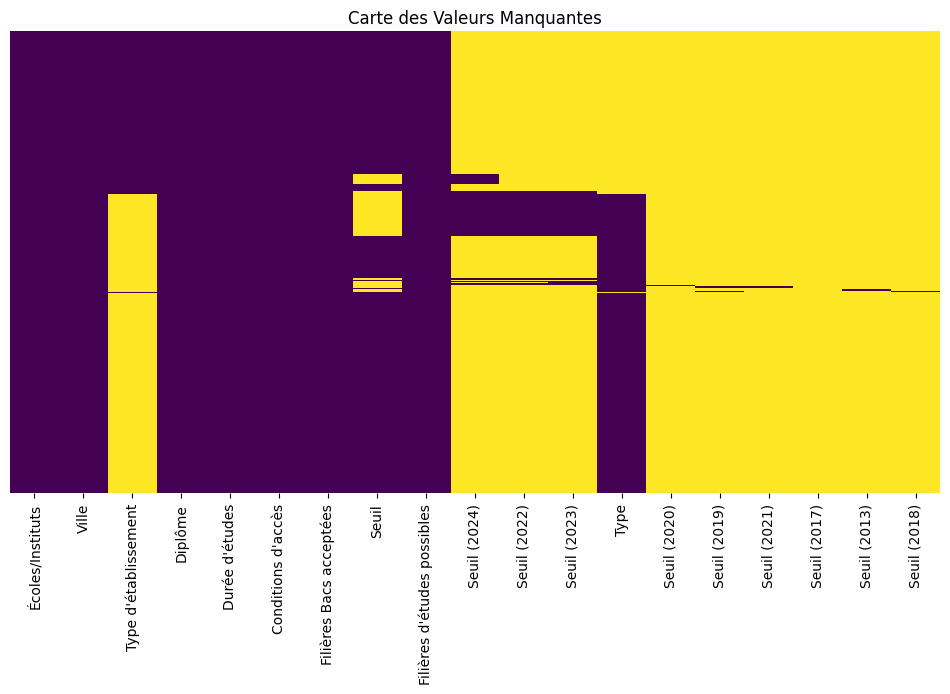

,Valeurs Manquantes,Pourcentage
Seuil (2017),1649,99.878861
Seuil (2020),1647,99.757723
Seuil (2013),1647,99.757723
Seuil (2018),1646,99.697153
Seuil (2021),1645,99.636584
Seuil (2019),1637,99.152029
Seuil (2022),1472,89.158086
Seuil (2023),1468,88.915809
Seuil (2024),1437,87.038159
Type d'établissement,1065,64.506360


Valeurs manquantes après standardisation :


Écoles/Instituts                  0
Ville                             0
Type d'établissement           1065
Diplôme                           0
Durée d'études                    0
Conditions d'accès                0
Filières Bacs acceptées           0
Seuil                           239
Filières d'études possibles       0
Seuil (2024)                   1437
Seuil (2022)                   1472
Seuil (2023)                   1468
Type                            586
Seuil (2020)                   1647
Seuil (2019)                   1637
Seuil (2021)                   1645
Seuil (2017)                   1649
Seuil (2013)                   1647
Seuil (2018)                   1646
dtype: int64

In [3]:
# ## 4. Analyse des Valeurs Manquantes

# %%
# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Carte des Valeurs Manquantes')
plt.show()

# Statistiques des valeurs manquantes
missing_stats = df.isnull().sum()
missing_percentage = (missing_stats / len(df)) * 100
missing_df = pd.DataFrame({
    'Valeurs Manquantes': missing_stats,
    'Pourcentage': missing_percentage
})
display(missing_df[missing_df['Valeurs Manquantes'] > 0].sort_values('Pourcentage', ascending=False))

# %% [markdown]
# ## 5. Standardisation des Valeurs Manquantes

# %%
# Liste des valeurs à considérer comme manquantes
na_values = [
    'N/A', 
    'Not specified', 
    'Non spécifié', 
    'N/A (Plateforme d\'orientation, pas une école proposant des filières)', 
    ''
]

# Standardisation des valeurs manquantes
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].replace(na_values, np.nan)
        df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

print("Valeurs manquantes après standardisation :")
display(df.isnull().sum())

In [4]:
# ## 6. Nettoyage du Texte

# %%
def clean_text_column(text):
    if isinstance(text, str):
        # Suppression des antislashs
        text = re.sub(r'\\', '', text)
        # Suppression des espaces multiples
        text = re.sub(r'\s+', ' ', text).strip()
    return text

# Application du nettoyage
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(clean_text_column)

print("Exemple de données après nettoyage :")
display(df.head())


Exemple de données après nettoyage :


,Écoles/Instituts,Ville,Type d'établissement,Diplôme,Durée d'études,Conditions d'accès,Filières Bacs acceptées,Seuil,Filières d'études possibles,Seuil (2024),Seuil (2022),Seuil (2023),Type,Seuil (2020),Seuil (2019),Seuil (2021),Seuil (2017),Seuil (2013),Seuil (2018)
0,Facultés des Lettres et des Sciences Humaines ...,Casablanca (Ain Chock,Université publique,Licence,3 ans,Baccalauréat toutes filières. Des conditions s...,Toutes les filières du baccalauréat,N/A (Accès ouvert basé sur la répartition géog...,Études Islamiques,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Facultés des Lettres et des Sciences Humaines ...,Casablanca (Ain Chock,Université publique,Licence,3 ans,Baccalauréat toutes filières. Des conditions s...,Toutes les filières du baccalauréat,N/A (Accès ouvert basé sur la répartition géog...,Études Arabes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Facultés des Lettres et des Sciences Humaines ...,Casablanca (Ain Chock,Université publique,Licence,3 ans,Baccalauréat toutes filières. Des conditions s...,Toutes les filières du baccalauréat,N/A (Accès ouvert basé sur la répartition géog...,Études Amazighes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Facultés des Lettres et des Sciences Humaines ...,Casablanca (Ain Chock,Université publique,Licence,3 ans,Baccalauréat toutes filières. Des conditions s...,Toutes les filières du baccalauréat,N/A (Accès ouvert basé sur la répartition géog...,Études Françaises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Facultés des Lettres et des Sciences Humaines ...,Casablanca (Ain Chock,Université publique,Licence,3 ans,Baccalauréat toutes filières. Des conditions s...,Toutes les filières du baccalauréat,N/A (Accès ouvert basé sur la répartition géog...,Études Anglaises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


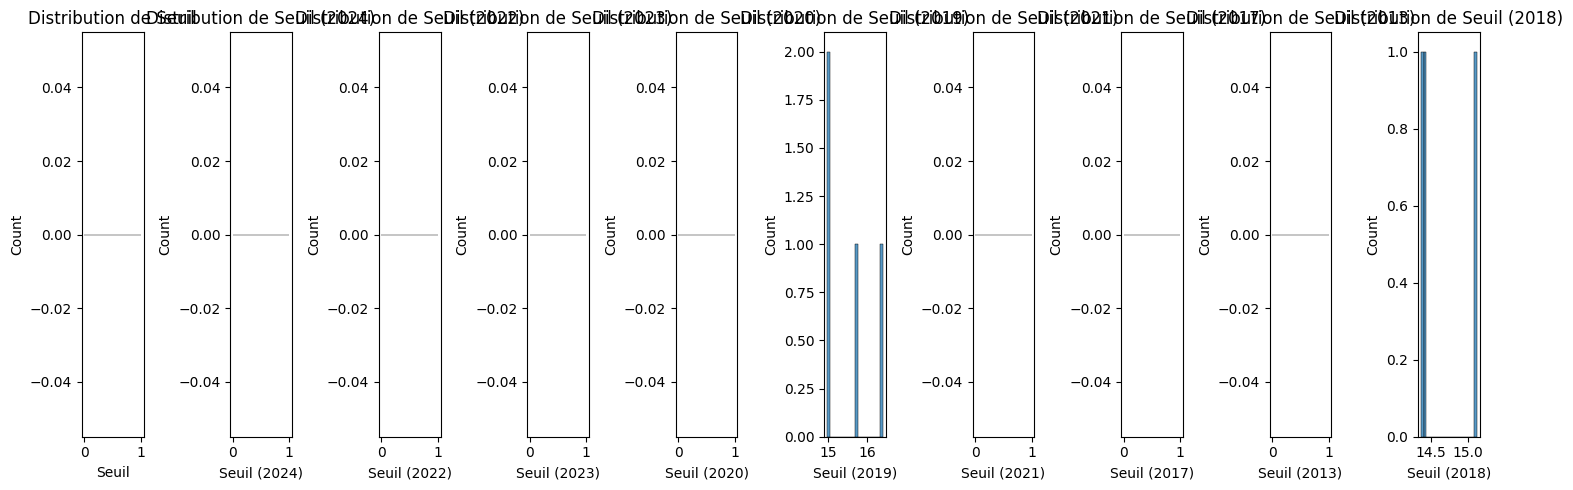

In [5]:
# ## 7. Analyse des Seuils

# %%
# Identification des colonnes de seuils
seuil_columns = [col for col in df.columns if col.startswith('Seuil')]

# Conversion des seuils en valeurs numériques
for col in seuil_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Visualisation de la distribution des seuils
plt.figure(figsize=(15, 5))
for i, col in enumerate(seuil_columns, 1):
    plt.subplot(1, len(seuil_columns), i)
    sns.histplot(data=df, x=col, bins=20)
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

In [6]:
# ## 8. Analyse des Doublons

# %%
# Identification des doublons
duplicate_rows = df.duplicated().sum()
print(f"Nombre total de lignes dupliquées : {duplicate_rows}")

if duplicate_rows > 0:
    print("\nExemple de lignes dupliquées :")
    display(df[df.duplicated(keep=False)].head())


Nombre total de lignes dupliquées : 0


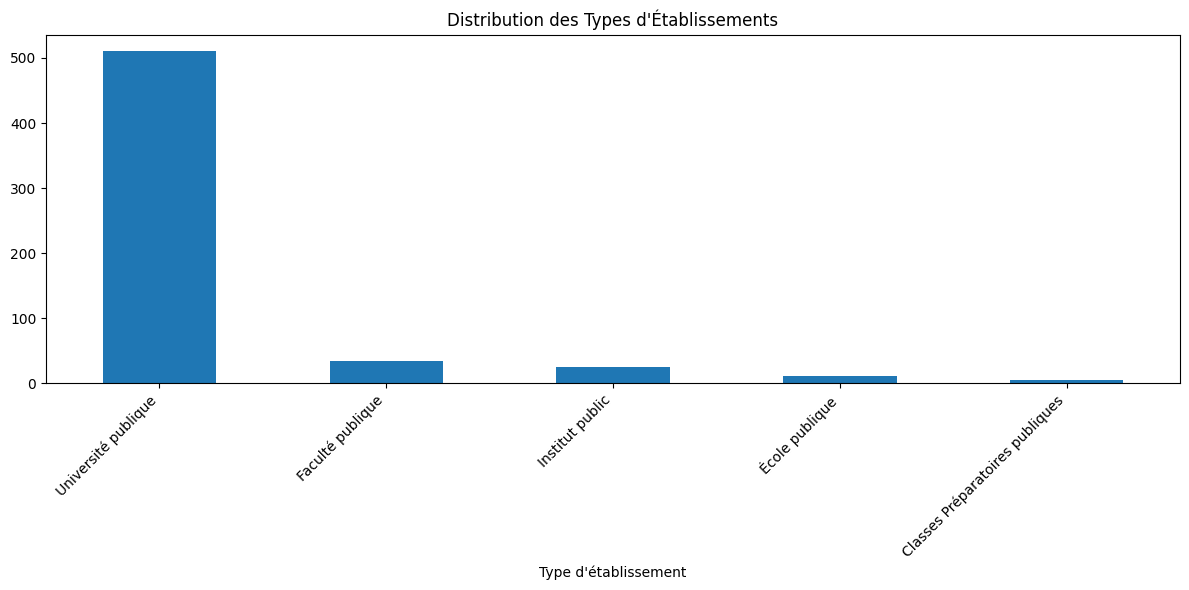

In [7]:
 ## 9. Analyse des Types d'Établissements

# %%
# Distribution des types d'établissements
plt.figure(figsize=(12, 6))
df['Type d\'établissement'].value_counts().plot(kind='bar')
plt.title('Distribution des Types d\'Établissements')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [8]:
# ## 10. Sauvegarde des Données Nettoyées

# %%
# Sauvegarde du dataset nettoyé
df.to_csv('data_expanded_cleaned.csv', index=False)
print("Dataset nettoyé sauvegardé avec succès.") 

Dataset nettoyé sauvegardé avec succès.
